### PCA範例
- 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

In [16]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [21]:
#定義PCA與隨後的羅吉斯回歸函數
#penalty 改為L1, max_iter改為100
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, 
                        tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
x_digits = digits.data
y_digits = digits.target

In [22]:
# 執行 GridSearchCV 跑出最佳參數(GridSearchCV:自動調參數程式)
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(x_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.922):
{'logistic__alpha': 0.01, 'pca__n_components': 64}


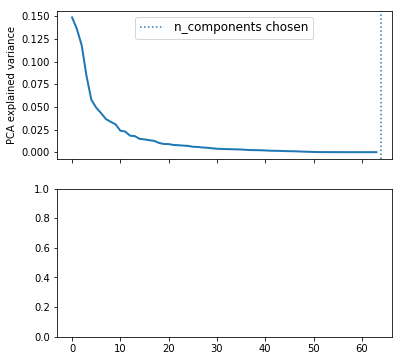

In [23]:
# 繪製不同 components 的 PCA explained variance ratio
pca.fit(x_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [24]:
# 繪製 7 個不同採樣點的 accuracy
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

### 觀察結果
- explained variance ratio : 解釋變異性隨著 components 穩定下降
    分類預測準確率 : 似乎也隨著 components 提升, 但是在 20 以後提升不多


### 作業
- 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [32]:
#定義PCA與隨後的羅吉斯回歸函數
#penalty 改為L1, max_iter改為100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, 
                        tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
X = X_digits.copy()
y = y_digits.copy()
print(X.shape)
print(y.shape)
# y = y.reshape(-1,1)
print(y.shape)

(1797, 64)
(1797,)
(1797,)


In [33]:
# 執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.913):
{'logistic__alpha': 0.01, 'pca__n_components': 20}


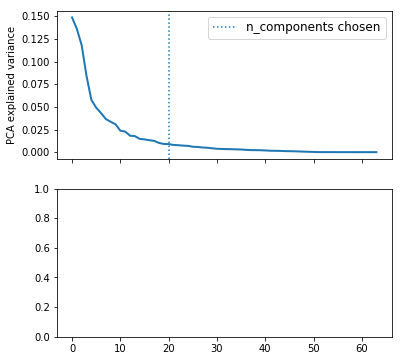

In [34]:
# 繪製不同 components 的 PCA explained variance ratio
pca.fit(x_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [35]:
# 繪製不同採樣點的 accuracy
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [39]:
##參考別人寫法
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
df = pd.DataFrame({}, columns=['n_component','accuracy'])
df['n_component'] = [1, 10, 24, 32, 48, 64]
accuracy_scores =[]

for i in [1, 10, 24, 32, 48, 64]:
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf = SGDClassifier(alpha=0.01, loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
    clf.fit(X_train_pca,y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    
df['accuracy'] = accuracy_scores
df

,n_component,accuracy
0,1,0.205556
1,10,0.902778
2,24,0.950000
3,32,0.947222
4,48,0.927778
5,64,0.936111
